***1: Classification of Hand-Written Digits***

Sklearn provides a dataset of handwritten digits as one of the examples. This data includes impages of 1787 digits. For each digit, we have 64 variables x1,x2,...x64, each one representing a pixel (grayscale from 0 to 16) on the 8x8 image. The label (y) for each image is the actual digit it represents from 0 to 9.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import t

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Load the data
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data # the digits data
y = digits.target # the labels for the digits. This label is only used for coloring the points.
#Make a dataframe
data=pd.DataFrame(np.concatenate((y.reshape(len(y),1),X),axis=1))
data.columns=["y"]+["x{}".format(i) for i in range(1,65)]
data.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
0,0.0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,2.0,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,3.0,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,4.0,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [3]:
#original image data is a 2D array
X.shape

(1797, 64)

Take the first 10 observations and reconstruct the graph:

Label:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


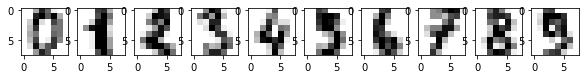

In [4]:
#plot the digits using imshow from matplotlib
plt.figure(figsize=(10,1))
print("Label:{}".format(list(y[:10])))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X[i].reshape(8,8), cmap=plt.cm.gray_r)
plt.show()

**Task 1: Apply PCA to see if we can describe the data with a smaller number of most significant features**

In [5]:
#import PCA modules
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import r2_score

In [6]:
#set target variable (y) as index
data = data.set_index('y')

In [7]:
#Note: do not need to standardize variables in this case as they represent pixels (placement) not values with magnitude
scalerDigits = preprocessing.StandardScaler().fit(data)
dataS=scalerDigits.transform(data)  

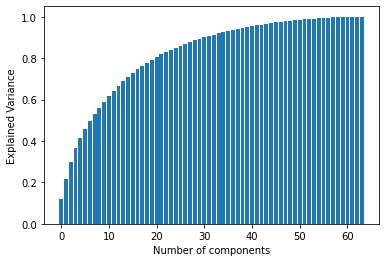

In [8]:
#Plot explained variance per number of leading PC's 
#perform PC decomposition over data
pca = PCA(dataS.shape[1])
dataP=pca.fit_transform(dataS)
eigenvalues = pca.explained_variance_ratio_
#plot explained variance over the number of components
n=64
plt.bar(np.arange(n), eigenvalues[:n].cumsum())
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.show()

Around 20-25 leading principal components explain 80 percent of the variance in the data

**Task 2: Now use three leading PCs to visualize the digits (different colors for different digits)**

In [9]:
# create Digit labels in order to plot
Z=np.array(data.index)
zeroInd=(Z==0) #zero
oneInd=(Z==1) #one
twoInd=(Z==2) #two
threeInd=(Z==3) #three
fourInd=(Z==4) #four
fiveInd=(Z==5) #five
sixInd=(Z==6) #six
sevenInd=(Z==7) #seven
eightInd=(Z==8) #eight
nineInd=(Z==9) #nine

#create an array of the same length as data index providing the digit number
D=Z*0
D[zeroInd]=0
D[oneInd]=1
D[twoInd]=2
D[threeInd]=3
D[fourInd]=4
D[fiveInd]=5
D[sixInd]=6
D[sevenInd]=7
D[eightInd]=8
D[nineInd]=9

In [10]:
#reapply PCA with three components so we can visualize in 3 dimensions
pca = PCA(n_components=3)
dataP = pca.fit_transform(dataS)

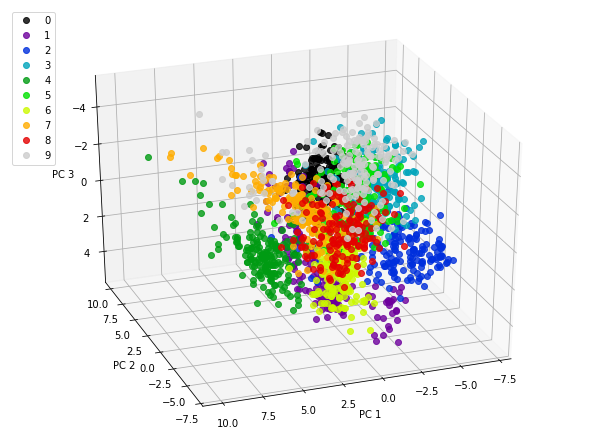

In [11]:
# use matplotlib 3D scatter plot: https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
cmap=plt.cm.nipy_spectral(np.linspace(0, 1, 10))

for d in range(0,10):
    plt.plot(np.array(dataP[D==d,0]), np.array(dataP[D==d,1]), np.array(dataP[D==d,2]), 
                 'o', color=cmap[d], alpha=0.8, label=d)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
ax.set_zlabel('PC 3')
plt.legend(['0','1','2','3','4','5','6','7','8','9'],loc='upper left');

**Task 3: Find six examples of the pairs of digits which a) can and b) can not be clearly distinguished on a 2D plot of first two PCs (3 examples each)**

Text(0, 0.5, 'PC 2')

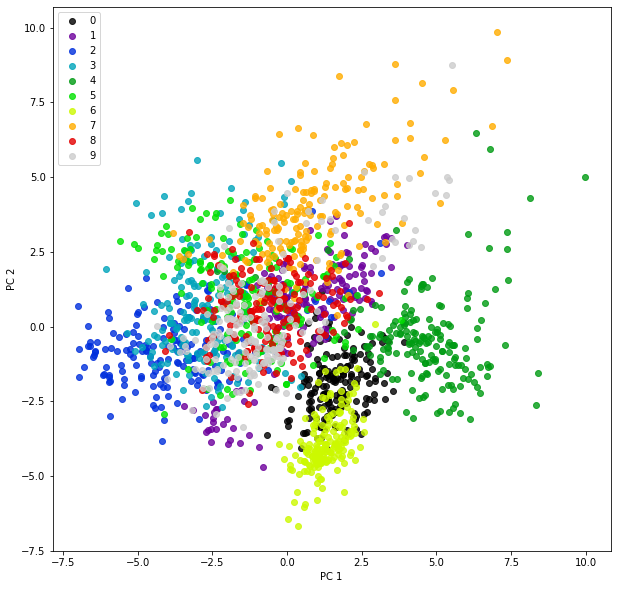

In [12]:
## code here

colors=('gray','red','green','blue','yellow','brown')
fig = plt.figure(figsize=(10,10))
for d in range(0,10):
    plt.plot(np.array(dataP[D==d,0]), np.array(dataP[D==d,1]), 
                 'o', color=cmap[d], alpha=0.8, label=d)
plt.legend(['0','1','2','3','4','5','6','7','8','9'],loc='upper left');

plt.xlabel('PC 1')
plt.ylabel('PC 2')

Easily distinguishable: (2, 4), (2, 6), (4, 7)

Not easily distinguishable: (0, 6), (8, 9), (1, 9)

***2: PCA for feature engineering***

Another common application of PCA is overcomming multicollinearity and overfitting in regression models. Here we'll use PCA for reducing dimensionality of a data set and improving the accuracy in the regression task.

In [13]:
#read data
data=pd.read_csv("https://raw.githubusercontent.com/CUSP2021ADS/Data/main/pca_synthetic.csv")
data.head()

,Y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,3.035437,-18.227424,30.521149,-37.494755,31.108940,-8.917930,13.177162,10.153335,17.521327,14.695400,7.222120,3.142381,13.754352,0.115685,6.263643,8.957240
1,1.479243,31.210052,8.273238,17.545475,8.013616,-3.163515,12.632948,10.384905,7.278064,11.506060,21.150410,14.558149,15.393978,13.701066,14.993476,17.993337
2,-1.193325,-2.427634,1.698858,-1.980364,-9.902694,9.215057,9.984092,7.627307,7.701929,15.254064,15.665984,6.676761,14.504275,19.329674,11.312780,13.360359
3,0.634462,-10.778091,-4.718246,-4.861350,13.543559,-10.575067,25.562832,2.064966,12.297941,7.063591,14.787318,4.751835,16.473578,15.697654,3.765299,8.776716
4,-0.125792,5.547746,-10.935812,-1.397010,1.977636,-17.475947,13.159905,18.881544,4.986746,12.079755,13.762270,5.192296,11.656484,13.370774,16.536450,7.264736


**Task 1: Run a linear regression with 'Y' as the target and x1-x15 as regressors and report out of sample R2 score**

Split the data into training and test (choose 70:30 split) and report out of sample score with test data. Also comment on the significance of the regressors (based on p-values)

In [14]:
dataX = data.iloc[:,1:16]
Y = data.Y
lm=sm.OLS(Y,sm.add_constant(dataX)).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     12.33
Date:                Sat, 04 Jun 2022   Prob (F-statistic):           1.20e-09
Time:                        10:34:25   Log-Likelihood:                -53.727
No. Observations:                  50   AIC:                             139.5
Df Residuals:                      34   BIC:                             170.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.2459      2.386     -4.295      0.0

In [15]:
## report mean out-of-sample R2 score
np.random.seed(0)

R_IS=[]; R_OS=[] #lists for recording in-sample (training) and out-of-sample (test) R2
n=20 #number of runs
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(sm.add_constant(data.iloc[:,1:16]),Y,test_size=0.3) #randomly split data into training (70%) and test (30%)
    res=sm.OLS(y_train,X_train).fit()
    R_IS.append(res.rsquared)   
    y_pred=res.predict(X_test)
    R_OS.append(r2_score(y_test,y_pred))
    

print("IS R-squared is %.3f+-%.3f"%(np.mean(R_IS),np.std(R_IS)))
print("OS R-squared is %.3f+-%.3f"%(np.mean(R_OS),np.std(R_OS)))

IS R-squared is 0.871+-0.037
OS R-squared is 0.447+-0.292


OS R2 significantly less than IS R2: suggest overfitting

**Task 2: Try PCA - use a few leading principal components as regressors and see if they will perform better in the regression**

You can choose the number of PCs by either checking explained variance or by trying out different numbers and choosing one that works best.

Split the data into training and test and report mean test accuracy.

In [16]:
## code here
#standardize data before trying PCA
scalerData = preprocessing.StandardScaler().fit(dataX)
dataS=scalerData.transform(dataX)   

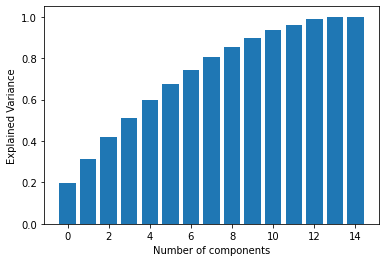

In [18]:
## plot explained variance barplot and comment on the appropriate number of eigenvectors based on that
pca = PCA(dataS.shape[1])
dataP=pca.fit_transform(dataS)
eigenvalues = pca.explained_variance_ratio_
#plot explained variance over the number of components
n=15
plt.bar(np.arange(n), eigenvalues[:n].cumsum())
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.show()

Around 8 components explain for 80% of the variation in the data.

In [19]:
## run linear regression again but with 8 PCs
np.random.seed(0)
# Apply cross-validation to diagnose model for overfitting
R_IS=[]; R_OS=[] #lists for recording in-sample (training) and out-of-sample (test) R2
n=20 #number of runs
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(sm.add_constant(data.iloc[:,1:16]),Y,test_size=0.3) #randomly split data into training (70%) and test (30%)
    #now apply PCA to the training data
    scaler = preprocessing.StandardScaler().fit(X_train) #introduce a scaler first as it is important to scale data before PCA!
    pca = PCA(8) #take only 3 leading principal components to get enough data but avoid overfitting
    P_train=pca.fit_transform(scaler.transform(X_train)) #get principal components for the scaled training sample
    res=sm.OLS(y_train,sm.add_constant(P_train)).fit() #fit the regression over 
    #and apply the same scaling and rotation (PCA) transform we learned for training sample to the test sample
    #this is important that we learn scaling and PCA transform from the training sample only rather than from both - training and test
    #as this is part of the principle component regression we need to train; and all training should happen over the training set
    P_test=pca.transform(scaler.transform(X_test))
    y_pred=np.asarray(res.predict(sm.add_constant(P_test)))
    
    R_IS.append(res.rsquared)
    R_OS.append(r2_score(y_test,y_pred))
#print("IS R-squared is %.3f+-%.3f"%(np.mean(R_IS),np.std(R_IS)))
#print("OS R-squared is %.3f+-%.3f"%(np.mean(R_OS),np.std(R_OS)))

In [20]:
## report out of sample mean R2 score
print("OS R-squared is %.3f+-%.3f"%(np.mean(R_OS),np.std(R_OS)))

OS R-squared is -0.013+-0.412


It seems PCA increase the R2 value by some amount plus reduces the complexity of model (we now have just 8 features compared to 15 bofore).
> Important Note: Due to the low sample size of above data, we can have varying R2 scores due to random splits of traing and testing samples.

***3: Modeling mean income with 311 complaint patterns***

We'll use 311 complaints data set to model the mean income of zip codes in NYC. We will also check if using PCA in this case improves the performance as compared to just the linear model.

In [21]:
#load the income data
dataIncome=pd.read_csv("https://raw.githubusercontent.com/CUSP2021ADS/Data/main/MeanZIP.csv",index_col=0)
dataIncome=dataIncome.apply(pd.to_numeric, errors='coerce')
dataIncome=dataIncome.loc[dataIncome.Mean>0]
dataIncome.head()

,Median,Mean,Pop
Zip,,,
1001,56662.5735,66687.7509,16445
1002,49853.4177,75062.6343,28069
1003,28462.0000,35121.0000,8491
1005,75423.0000,82442.0000,4798
1007,79076.3540,85801.9750,12962


In [22]:
## 311 data
data311 = pd.read_csv('https://raw.githubusercontent.com/CUSP2021ADS/Data/main/aggr311.csv' , index_col=0 )
data311.Zip=pd.to_numeric(data311.Zip,errors='coerce')
data311=data311.loc[(data311.Zip>=10000)&(data311.Zip<11500)] #take only NYC zip codes
data311=pd.pivot_table(data311,index='Zip',columns='Complain',values='Count',fill_value=0)
Total311=data311.sum(axis=1) #total 311 activity per zip code
data311=data311.div(data311.sum(axis=1), axis=0) #normalize activity of various cathegories within zip code by total
data311=data311.loc[Total311>100] #keep only those zip codes having sufficient activity
data311.head()

Complain,APPLIANCE,Adopt-A-Basket,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,BEST/Site Safety,Beach/Pool/Sauna Complaint,Bike Rack Condition,...,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment
Zip,,,,,,,,,,,,,,,,,,,,,
10000.0,0.000000,0.000000,0.008772,0.0,0.000000,0.008772,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.070175,0.070175,0.000000,0.000000,0.000000,0.0,0.0
10001.0,0.000000,0.000146,0.013179,0.0,0.000000,0.000146,0.002929,0.005272,0.000146,0.000146,...,0.000439,0.000000,0.000293,0.007468,0.000732,0.000732,0.000293,0.053595,0.0,0.0
10002.0,0.001330,0.000000,0.007095,0.0,0.000000,0.001862,0.001596,0.001774,0.000177,0.000532,...,0.000443,0.000089,0.000355,0.002394,0.001242,0.000887,0.000621,0.028734,0.0,0.0
10003.0,0.001331,0.000089,0.012690,0.0,0.000177,0.003905,0.002130,0.001154,0.000177,0.000177,...,0.000621,0.000976,0.000177,0.004792,0.002218,0.001065,0.000444,0.028219,0.0,0.0
10004.0,0.000000,0.000000,0.009740,0.0,0.000000,0.002597,0.001948,0.000649,0.000000,0.000649,...,0.000649,0.000649,0.000000,0.010390,0.013636,0.000000,0.000000,0.024026,0.0,0.0


In [23]:
#merge income data with 311
DataIncome1=dataIncome.merge(data311,left_index=True,right_index=True)
DataIncome1.head()

,Median,Mean,Pop,APPLIANCE,Adopt-A-Basket,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,...,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment
Zip,,,,,,,,,,,,,,,,,,,,,
10001.0,71244.6100,123112.7764,17678,0.000000,0.000146,0.013179,0.0,0.000000,0.000146,0.002929,...,0.000439,0.000000,0.000293,0.007468,0.000732,0.000732,0.000293,0.053595,0.0,0.0
10002.0,30843.9574,46258.6118,70878,0.001330,0.000000,0.007095,0.0,0.000000,0.001862,0.001596,...,0.000443,0.000089,0.000355,0.002394,0.001242,0.000887,0.000621,0.028734,0.0,0.0
10003.0,89998.5339,139330.9968,53609,0.001331,0.000089,0.012690,0.0,0.000177,0.003905,0.002130,...,0.000621,0.000976,0.000177,0.004792,0.002218,0.001065,0.000444,0.028219,0.0,0.0
10004.0,110183.6857,156682.7615,1271,0.000000,0.000000,0.009740,0.0,0.000000,0.002597,0.001948,...,0.000649,0.000649,0.000000,0.010390,0.013636,0.000000,0.000000,0.024026,0.0,0.0
10005.0,115133.2855,163762.6601,1517,0.000000,0.000000,0.008219,0.0,0.000000,0.002192,0.000548,...,0.000000,0.000000,0.000000,0.013699,0.000000,0.000548,0.000000,0.019726,0.0,0.0


**Task 1: Using 'Mean' as target variable, and 311 complaints as regressors, run a linear regression model and report out of sample (test) accuracy after cross validation**

In [24]:
np.random.seed(0)
# Apply cross-validation to diagnose model for overfitting
X = DataIncome1.iloc[:,3:]
Y = DataIncome1.Mean
R_IS=[]; R_OS=[] #lists for recording in-sample (training) and out-of-sample (test) R2
n=20 #number of runs
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(sm.add_constant(X),Y,test_size=0.3) #randomly split data into training (70%) and test (30%)
    res=sm.OLS(y_train,X_train).fit()
    R_IS.append(res.rsquared)   
    y_pred=res.predict(X_test)
    R_OS.append(r2_score(y_test,y_pred))
    
    #R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
print("IS R-squared is %.3f+-%.3f"%(np.mean(R_IS),np.std(R_IS)))
print("OS R-squared is %.3f+-%.3f"%(np.mean(R_OS),np.std(R_OS)))

IS R-squared is 1.000+-0.000
OS R-squared is -3.139+-3.129


IS R2 is 1 and OS R2 is negative, suggest overfitting.

**Task 2: Now analyze performance using PCA depending on the number N of leading PCs to take.**

In [25]:
# apply PCA first for whole data
#Note: no need to standardize data first as it is already normalized

#then apply PCA
pca = PCA(X.shape[1])
dataP=pca.fit_transform(X)
eigenvalues = pca.explained_variance_ratio_

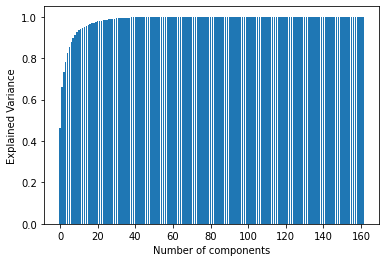

In [26]:
## plot explained variance barplot and comment on the appropriate number of eigenvectors based on that
n=X.shape[1]
plt.bar(np.arange(n), eigenvalues[:n].cumsum())
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.show()

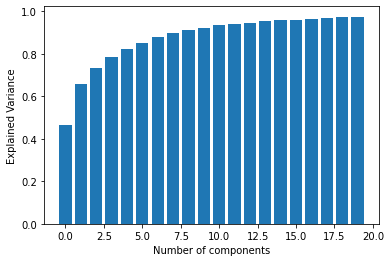

In [27]:
## take a closer look with less components
n=20
plt.bar(np.arange(n), eigenvalues[:n].cumsum())
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.show()

Just 5 components explain 80% variance in the data.

In [29]:
## train a linear model based on above N PCs and report out of sample accuracy (with cross-validation)

np.random.seed(0)
# Apply cross-validation to diagnose model for overfitting

X = DataIncome1.iloc[:,3:]
Y = DataIncome1.Mean
R_IS=[]; R_OS=[] #lists for recording in-sample (training) and out-of-sample (test) R2
n=20 #number of runs
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3) #randomly split data into training (70%) and test (30%)
    #now apply PCA to the training data
    scaler = preprocessing.StandardScaler().fit(X_train) #introduce a scaler first as it is important to scale data before PCA!
    pca = PCA(5) #take only 5 leading principal components to get enough data but avoid overfitting
    P_train=pca.fit_transform(scaler.transform(X_train)) #get principal components for the scaled training sample
    res=sm.OLS(y_train,sm.add_constant(P_train)).fit() #fit the regression over 

    P_test=pca.transform(scaler.transform(X_test))
    y_pred=np.asarray(res.predict(sm.add_constant(P_test)))
    
    R_IS.append(res.rsquared)
    R_OS.append(r2_score(y_test,y_pred))
print("IS R-squared is %.3f+-%.3f"%(np.mean(R_IS),np.std(R_IS)))
print("OS R-squared is %.3f+-%.3f"%(np.mean(R_OS),np.std(R_OS)))

IS R-squared is 0.647+-0.028
OS R-squared is 0.541+-0.139


OS R2 significantly increases with PCA

**Task 3: Try implementing Lasso regression (feature selection) over all the PCs.**

Use alpha=10000 as the regularization parameter. Report out of sample mean R2 score by splitting data into train and test

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

pca = PCA(X_train.shape[0])
P_train=pca.fit_transform(X_train)
P_test=pca.transform(X_test)

Lasso=linear_model.Lasso(fit_intercept=True, alpha=10000)
Lasso.fit(P_train,y_train)
YPred_OS=Lasso.predict(P_test)
print("The OS R-squared of Lasso is: {0}".format(r2_score(y_test,YPred_OS)))

The OS R-squared of Lasso is: -0.06755531461671471


Linear model with Lasso does not give any good R2 score.

**Task 4: Implement cross-validation for Lasso PCA regression above with further splitting the training sample into training and validation and tuning the parameter over the validation sample**

In [60]:
np.random.seed(0)

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train,test_size=0.2)

r2_val = []

for alpha in np.linspace(10,1000,200):
    
    pca = PCA(X_train.shape[0])
    P_train=pca.fit_transform(X_train)
    P_val=pca.transform(X_valid)
    
    Lasso=linear_model.Lasso(fit_intercept=True, alpha=alpha)
    Lasso.fit(P_train,y_train)
    YPred_OS=Lasso.predict(P_val)
    
    r2_val.append(r2_score(y_valid,YPred_OS))

Text(0, 0.5, 'validation r2')

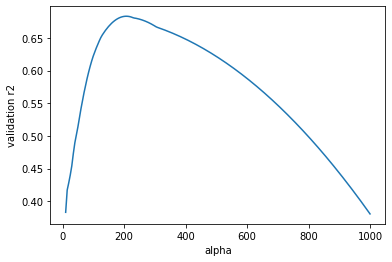

In [61]:
plt.plot(np.linspace(10,1000,200), r2_val)
plt.xlabel('alpha')
plt.ylabel('validation r2')

In [62]:
print('best alpha:', np.linspace(10,1000,200)[np.argmax(r2_val)])

best alpha: 208.99497487437185


In [63]:
# test accuracy

P_test = pca.transform(X_test)

Lasso=linear_model.Lasso(fit_intercept=True, alpha=208.99)
Lasso.fit(P_train,y_train)
YPred_OS=Lasso.predict(P_test)
    
print(r2_score(y_test,YPred_OS))

0.7801247628531063


OS R-squared performs much better after tuning parameter alpha